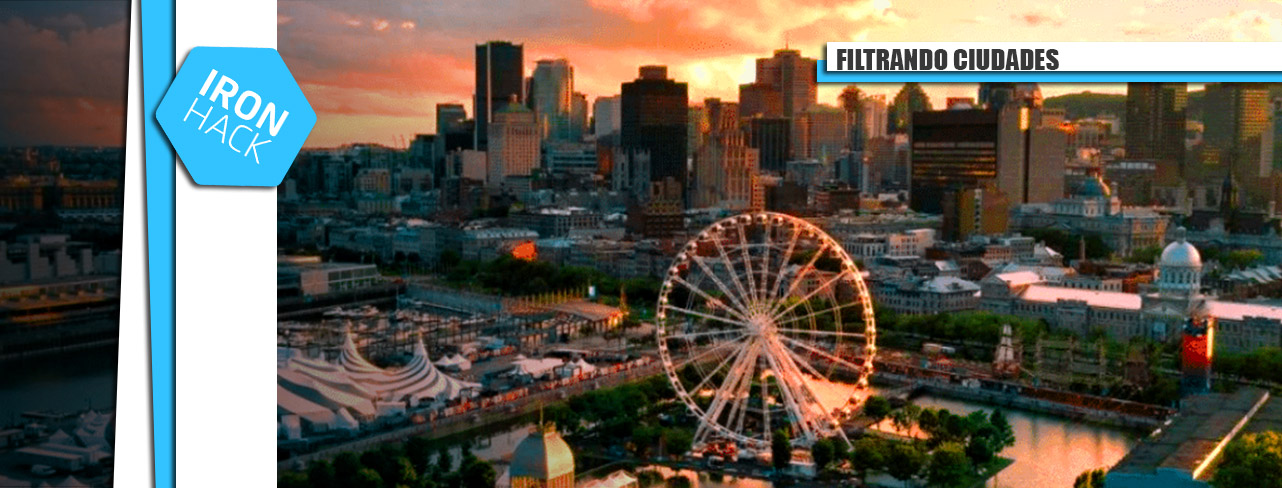

In [1]:
import sys
sys.path.append("../")

In [2]:
import pandas as pd
import src.tratamiento_datos as td

In [302]:
from itertools import zip_longest

In [27]:
import requests
from bs4 import BeautifulSoup

In [3]:
from pymongo import MongoClient
client = MongoClient("localhost:27017")
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [4]:
db = client.get_database("ironhack")
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ironhack')

In [5]:
companies = db.get_collection('companies')

In [6]:
companies.distinct('category_code')

[None,
 'advertising',
 'analytics',
 'automotive',
 'biotech',
 'cleantech',
 'consulting',
 'design',
 'ecommerce',
 'education',
 'enterprise',
 'fashion',
 'finance',
 'games_video',
 'government',
 'hardware',
 'health',
 'hospitality',
 'legal',
 'local',
 'manufacturing',
 'medical',
 'messaging',
 'mobile',
 'music',
 'nanotech',
 'network_hosting',
 'news',
 'nonprofit',
 'other',
 'photo_video',
 'public_relations',
 'real_estate',
 'search',
 'security',
 'semiconductor',
 'social',
 'software',
 'sports',
 'transportation',
 'travel',
 'web']

nos hacemos una lista de todas las compañías quedándonos con su nombre, su categoría, el dinero conseguido y la lista de oficinas.

In [7]:
proj = {'_id' : 0, 'name' : 1, 'category_code' : 1, 'total_money_raised' : 1, 'offices' : 1}
companies_1m = list(companies.find({},proj))

In [8]:
companies_1m[0]['offices'][0]

{'description': '',
 'address1': '710 - 2nd Avenue',
 'address2': 'Suite 1100',
 'zip_code': '98104',
 'city': 'Seattle',
 'state_code': 'WA',
 'country_code': 'USA',
 'latitude': 47.603122,
 'longitude': -122.333253}

Limpiamos un poquito los datos para quedarnos únicamente con los que nos interesan.

In [9]:
td.limpiar_offices(companies_1m)

In [10]:
td.pasar_float(companies_1m)

In [11]:
companies_1m

[{'name': 'Wetpaint',
  'category_code': 'web',
  'total_money_raised': 39800000.0,
  'offices': [{'city': 'Seattle'}, {'city': 'New York'}]},
 {'name': 'AdventNet',
  'category_code': 'enterprise',
  'total_money_raised': '0',
  'offices': [{'city': 'Pleasanton'}]},
 {'name': 'Zoho',
  'category_code': 'software',
  'total_money_raised': '0',
  'offices': [{'city': 'Pleasanton'}]},
 {'name': 'Digg',
  'category_code': 'news',
  'total_money_raised': 45000000.0,
  'offices': [{'city': 'San Francisco'}]},
 {'name': 'Facebook',
  'category_code': 'social',
  'total_money_raised': 2430000000.0,
  'offices': [{'city': 'Menlo Park'},
   {'city': 'Dublin'},
   {'city': 'New York'}]},
 {'name': 'Omnidrive',
  'category_code': 'network_hosting',
  'total_money_raised': 800000.0,
  'offices': [{'city': 'Palo Alto'}]},
 {'name': 'Postini',
  'category_code': 'web',
  'total_money_raised': '0',
  'offices': [{'city': 'San Carlos'}]},
 {'name': 'Geni',
  'category_code': 'web',
  'total_money_rais

Eliminamos todas las empresas con un beneficio inferior a 1.000.000

In [13]:
lista_1m = td.limpiar_1m(companies_1m)

Eliminamos todas las empresas que no tienen que ver con el sector tech

In [14]:
lista_1m_sector = td.limpiar_sector(lista_1m)

Nos quedamos solo con las ciudades

In [21]:
lista_ciudades = td.seleccionar_ciudades(lista_1m_sector)

In [22]:
len(lista_ciudades)

2942

Y hacemos que la lista sea de valores únicos

In [24]:
lista_ciudades = set(lista_ciudades)

In [26]:
lista_ciudades

{'',
 '00134 Roma',
 '2314 XZ Leiden',
 '303 Twin Dolphin Drive Suite 600',
 '46395 Bocholt',
 '5-12-5 Ginza, Chuo-ku',
 'Aachen',
 'Abbotsford',
 'Abercynon',
 'Acton',
 'Addison',
 'Alberta',
 'Albuquerque',
 'Alcobendas',
 'Alexandria',
 'Aliso Viejo',
 'Almere',
 'Alpharetta',
 'Amherst',
 'Amman',
 'Amsterdam',
 'Andover',
 'Ann Arbor',
 'Annapolis',
 'Antwerp',
 'Arcadia',
 'Arlington',
 'Arlington Heights',
 'Aschheim-Dornach',
 'Asnieres sur seine',
 'Atlanta',
 'Atlanta,',
 'Auckland',
 'Austin',
 'BIDART',
 'BROOMFIELD',
 'Baar ZG',
 'Bahía Blanca',
 'Baltimore',
 'Banemarksvej 50 G',
 'Bangalore',
 'Bangkok',
 'Barcelona',
 'Bath',
 'Bath, Somerset',
 'Baton Rouge',
 'Beachwood',
 'Beaverton',
 'Beijing',
 'Belfast',
 'Bellevue',
 'Belmont',
 'Berkeley',
 'Berkshire',
 'Berlin',
 'Bet Shemesh',
 'Bethesda',
 'Beverly Hills',
 'Bilekahalli, Bangalore',
 'Billerica',
 'Birmingham',
 'Bloomfield',
 'Bluffdale',
 'Boca Raton',
 'Bogota',
 'Boothwyn',
 'Bordeaux',
 'Bordeaux Cede

Vamos a scrapear una tabla de ciudades con su coste de vida, la página elegida es https://es.numbeo.com/coste-de-vida/clasificaciones-actuales

In [29]:
url = 'https://es.numbeo.com/coste-de-vida/clasificaciones-actuales'
html = requests.get(url)
soup = BeautifulSoup(html.content, 'html.parser')

In [45]:
cuerpo = soup.find_all('tbody')

In [51]:
filas = cuerpo[0].find_all('tr')

In [61]:
filas[0].text.strip('\n').split('\n')

['Hamilton, Islas Bermudas',
 '149,30',
 '98,19',
 '125,58',
 '147,70',
 '166,13',
 '80,79']

In [85]:
coste_vida_ciudades = {
    'ciudad' : [],
    'país' : [],
    'coste_vida' : [],
    'alquiler' : [],
    'coste_vida_alquiler' : [],
    'alimentos' : [], 
    'restaurantes' : [],
    'poder_adquisitivo_local' : []
}

In [86]:
for elem in filas:
    coste_vida_ciudades['coste_vida'].append(float(elem.text.strip('\n').split('\n')[1].replace(',', '.')))
    coste_vida_ciudades['alquiler'].append(float(elem.text.strip('\n').split('\n')[2].replace(',', '.')))
    coste_vida_ciudades['coste_vida_alquiler'].append(float(elem.text.strip('\n').split('\n')[3].replace(',', '.')))
    coste_vida_ciudades['alimentos'].append(float(elem.text.strip('\n').split('\n')[4].replace(',', '.')))
    coste_vida_ciudades['restaurantes'].append(float(elem.text.strip('\n').split('\n')[5].replace(',', '.')))
    coste_vida_ciudades['poder_adquisitivo_local'].append(float(elem.text.strip('\n').split('\n')[1].replace(',', '.')))
    

In [103]:
ciudades = [elem.text.strip('\n').split('\n')[0].split(',')[0].strip() for elem in filas]
paises = [elem.text.strip('\n').split('\n')[0].split(',')[1].strip() for elem in filas]

In [104]:
coste_vida_ciudades['ciudad'] = ciudades
coste_vida_ciudades['país'] = paises

In [106]:
coste_vida = pd.DataFrame(coste_vida_ciudades)

In [107]:
coste_vida

,ciudad,país,coste_vida,alquiler,coste_vida_alquiler,alimentos,restaurantes,poder_adquisitivo_local
0,Hamilton,Islas Bermudas,149.30,98.19,125.58,147.70,166.13,149.30
1,Zúrich,Suiza,130.31,71.03,102.79,130.90,130.58,130.31
2,Basilea,Suiza,129.02,50.42,92.54,127.61,129.87,129.02
3,Lausana,Suiza,126.02,60.58,95.65,128.21,128.98,126.02
4,Lugano,Suiza,124.80,42.15,86.43,126.42,119.08,124.80
...,...,...,...,...,...,...,...,...
597,Peshawar,Pakistán,22.18,2.74,13.16,18.33,20.05,22.18
598,Bhubaneshwar,India,22.14,3.65,13.56,24.07,13.93,22.14
599,Visakhapatnam,India,21.26,4.14,13.31,24.60,12.46,21.26
600,Kanpur,India,21.05,3.82,13.05,21.05,13.95,21.05


In [110]:
coste_vida_euros = coste_vida[['ciudad', 'coste_vida', 'alquiler', 'coste_vida_alquiler']]

In [111]:
coste_vida_euros

,ciudad,coste_vida,alquiler,coste_vida_alquiler
0,Hamilton,149.30,98.19,125.58
1,Zúrich,130.31,71.03,102.79
2,Basilea,129.02,50.42,92.54
3,Lausana,126.02,60.58,95.65
4,Lugano,124.80,42.15,86.43
...,...,...,...,...
597,Peshawar,22.18,2.74,13.16
598,Bhubaneshwar,22.14,3.65,13.56
599,Visakhapatnam,21.26,4.14,13.31
600,Kanpur,21.05,3.82,13.05


Para poder pasar los datos a euros sabiendo que la tabla que nos hemos bajado toman como referencia el coste de vida en Nueva York, hemos recogido los gastos que genera vivir en esta ciudad de esta página https://vivirenn.com/cuanto-cuesta-vivir-nueva-york/


coste_vida_NY = [2000, 117, 72, 240, 120, 70] estos datos son relativos respectivamente a [alquiler, transporte, internet, alimentación, lavandería, móvil]

In [149]:
coste_vida_euros['coste_vida'] = coste_vida_euros['coste_vida'].apply(td.pasar_a_euros_cv)
coste_vida_euros['alquiler'] = coste_vida_euros['alquiler'].apply(td.pasar_a_euros_a)
coste_vida_euros['coste_vida_alquiler'] = coste_vida_euros['coste_vida_alquiler'].apply(td.pasar_a_euros_cva)

<ipython-input-149-dc0ed1b49beb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coste_vida_euros['coste_vida'] = coste_vida_euros['coste_vida'].apply(pasar_a_euros_cv)
<ipython-input-149-dc0ed1b49beb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coste_vida_euros['alquiler'] = coste_vida_euros['alquiler'].apply(pasar_a_euros_a)
<ipython-input-149-dc0ed1b49beb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [150]:
coste_vida_euros

,ciudad,coste_vida,alquiler,coste_vida_alquiler
0,Hamilton,924.17,1963.8,3288.94
1,Zúrich,806.62,1420.6,2692.07
2,Basilea,798.63,1008.4,2423.62
3,Lausana,780.06,1211.6,2505.07
4,Lugano,772.51,843.0,2263.60
...,...,...,...,...
597,Peshawar,137.29,54.8,344.66
598,Bhubaneshwar,137.05,73.0,355.14
599,Visakhapatnam,131.60,82.8,348.59
600,Kanpur,130.30,76.4,341.78


In [151]:
coste_vida_euros['coste_anual'] = coste_vida_euros['coste_vida_alquiler'] * 12

<ipython-input-151-45ad2e1051e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coste_vida_euros['coste_anual'] = coste_vida_euros['coste_vida_alquiler'] * 12


### Ya tenemos una tabla donde queda reflejado el coste anual medio en esa ciudad. Usémosla para filtrar la lista de ciudades que teníamos previamente con empresas Tech de más de un millón de beneficios.

In [152]:
coste_vida_euros

,ciudad,coste_vida,alquiler,coste_vida_alquiler,coste_anual
0,Hamilton,924.17,1963.8,3288.94,39467.28
1,Zúrich,806.62,1420.6,2692.07,32304.84
2,Basilea,798.63,1008.4,2423.62,29083.44
3,Lausana,780.06,1211.6,2505.07,30060.84
4,Lugano,772.51,843.0,2263.60,27163.20
...,...,...,...,...,...
597,Peshawar,137.29,54.8,344.66,4135.92
598,Bhubaneshwar,137.05,73.0,355.14,4261.68
599,Visakhapatnam,131.60,82.8,348.59,4183.08
600,Kanpur,130.30,76.4,341.78,4101.36


In [153]:
ciudades_viables = list()

In [157]:
for index, row in coste_vida_euros.iterrows():
    for ciudad in lista_ciudades:
        try:
            if row['ciudad'] in ciudad and row['coste_anual'] <= 22000:
                ciudades_viables.append(row['ciudad'])
        except:
            pass

In [163]:
ciudades_viables = set(ciudades_viables)
len(ciudades_viables)

122

Hemos discriminado las ciudades con motivo de que tengan empresas con beneficios superiores a 1 millón de $ y posteriormente por razones económicas que permitan a nuestros trabajadores vivir con holgura en cualquiera de ellas hasta el punto de tener una lista de 122 posibles ciudades. Para terminar de filtrar esta lista vamos a scrapear un lista de ciudades con la mejor calidad de vida. vamos a usar esta web https://es.wikipedia.org/wiki/Anexo:Ciudades_por_calidad_de_vida

In [165]:
url_cv = 'https://es.wikipedia.org/wiki/Anexo:Ciudades_por_calidad_de_vida'
html_cv = requests.get(url_cv)
soup_cv = BeautifulSoup(html_cv.content, 'html.parser')

In [199]:
cuerpo_cv = soup_cv.find_all('tbody')
filas = cuerpo_cv[0].find_all('tr')

In [200]:
ciudades_calidad = list()

In [201]:
for elem in filas:
    ciudades_calidad.append([elem.text.strip('\n').split('\n\n')[-3], elem.text.strip('\n').split('\n\n')[-1]])

In [205]:
ciudades_calidad_filtradas = list()

In [206]:
for elem in ciudades_calidad:
    for ciudad in ciudades_viables:
        if ciudad in elem:
            ciudades_calidad_filtradas.append(elem)

In [207]:
ciudades_calidad_filtradas

[['Viena', '108.6'],
 ['Auckland', '107.4'],
 ['Vancouver', '107.4'],
 ['Wellington', '105.9'],
 ['Toronto', '105.3'],
 ['Ottawa', '105.5'],
 ['Melbourne', '104.8'],
 ['Stuttgart', '103.3'],
 ['Perth', '104.2'],
 ['Montreal', '104.2'],
 ['Canberra', '103.6'],
 ['Helsinki', '102.6'],
 ['Calgary', '103.5'],
 ['Brisbane', '102.4'],
 ['Madrid', '100.6'],
 ['Lisboa', '100.3'],
 ['Chicago', '100.3'],
 ['Barcelona', '100.2']]

In [208]:
len(ciudades_calidad_filtradas)

18

Llegados a este punto, tenemos dos opciones:
- La opción objetiva basada sólo en los datos recogidos hasta ahora, quedandonos con las tres primeras ciudades coincidentes en esta lista, puesto que tendrían todos los requisitos valorados hasta ahora y además serían las tres ciudades con mayor calidad de vida.
- La opción subjetiva de introducir nuevos datos de valoración como el lenguaje, la cultura y el clima. Y por tanto nos quedaremos con las tres ciudades que aparecen y forman parte de la península ibérica ('Madrid', 'Barcelona', 'Lisboa') y añadiendo un criterio muchísimo más caprichoso, añadiremos 'Montreal'

In [209]:
ciudades_elegidas = ['Madrid', 'Barcelona', 'Lisboa', 'Montreal']

In [281]:
proj2 = {'_id' : 0, 'name' : 1}
empresas_lisboa = list(companies.find({'offices.city' : 'Lisboa'}, proj2))

In [280]:
empresas_madrid = list(companies.find({'offices.city' : 'Madrid'}, proj2))

In [282]:
empresas_barcelona = list(companies.find({'offices.city' : 'Barcelona'}, proj2))

In [287]:
empresas_montreal = list(companies.find({'offices.city' : 'Montreal'}, proj2))

Filtremos los resultados con la lista de empresas tech de más de un millón que hemos sacado antes

In [288]:
empresas_montreal = filtrar_empresas_ciudad(td.empresas_montreal, lista_1m_sector)

In [289]:
empresas_madrid = filtrar_empresas_ciudad(td.empresas_madrid, lista_1m_sector)

In [290]:
empresas_lisboa = filtrar_empresas_ciudad(td.empresas_lisboa, lista_1m_sector)

In [291]:
empresas_barcelona = filtrar_empresas_ciudad(td.empresas_barcelona, lista_1m_sector)

Tenemos una lista para cada ciudad donde empezar a hacer las búsquedas de nuestra zona perfecta para situar nuestra primera (que no única) oficina

In [293]:
empresas_montreal

['Airborne Mobile',
 'Mobivox',
 'Radialpoint',
 'Akoha',
 'MediaScrape',
 'StatusNet',
 'Trellia Networks']

In [298]:
empresas_madrid

['Fon',
 'eRepublik',
 'Busuu',
 'Unkasoft Advergaming',
 'Nexway',
 'Tuenti Technologies',
 'Virgin Play',
 'ticketea',
 'Genasys',
 'BuyVIP']

In [295]:
empresas_barcelona

['Splendia',
 'Futurlink',
 'Openbravo',
 'UserZoom',
 'Veeva',
 'Teambox',
 'International Sportsbook']

In [294]:
empresas_lisboa

['Nexway']

In [300]:
dict_empresas = {'Madrid' : empresas_madrid, 'Barcelona' : empresas_barcelona, 'Montreal' : empresas_montreal, 'Lisboa' : empresas_lisboa}

In [304]:
empresas_ciudad = pd.DataFrame(zip_longest(*dict_empresas.values()), columns=dict_empresas)

In [306]:
empresas_ciudad.to_csv('../data/empresas_ciudad')